<a href="https://colab.research.google.com/github/GruAna/VU/blob/master/m_EasyOCR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyOCR

## Packages

In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import easyocr
import os
import cv2 as cv
import matplotlib.pyplot as plt

from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!cp drive/MyDrive/Colab_Notebooks/VU/utils.py .
from utils import *

## Setup

In [6]:
# if GPU is to be used, allow CUDA
use_GPU = True  # True

## Dataset loading

### CTW1500 dataset

 - testing set (500 images)

Get images. Update location of images **manually**.

Comment if not using CTW1500 dataset.

In [ ]:
# whether images are to be resized (skrinking)
resize = False
width = 3000

# path to image directory, get full path to all files
imgs_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/CTW1500/test_images'

(_, _, filenames) = next(os.walk(imgs_dir))
filenames.sort()
list_img_paths = [os.path.join(imgs_dir, file) for file in filenames]
n_imgs = len(list_img_paths)

# load images
images = [(cv.imread(file)) for file in list_img_paths]
                        
# shrink images
if resize:
    images = shrink_all(images, width)


# Get paths to files with labels. Update location manually
# path to label directory, get full path to all files
labels_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/CTW1500/test_labels'
(_, _, xml_files) = next(os.walk(labels_dir))
xml_files.sort()
list_xml_paths = [os.path.join(labels_dir, file) for file in xml_files]

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in enumerate(list_xml_paths):
        ratio = width / images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_ctw_test(file, scaling_ratio=ratio))
else:
    for i, file in enumerate(list_xml_paths):
        ground_truth.append(read_gt_ctw_test(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

### KAISTdetectiondataset

In [ ]:
# path to image and label directory, get full path to all files
directory = '/content/drive/MyDrive/Colab_Notebooks/VU/Kaist'

list_img_paths = []
list_bmp_paths = []
list_xml_paths = []
filenames = []
for path, dirs, files in os.walk(directory):
    for file in files:
        if(file.endswith(".jpg") or file.endswith(".JPG") ):
            list_img_paths.append(os.path.join(path, file))
            list_img_paths.sort()
            filenames.append(file)
        if(file.endswith(".bmp")):
            list_bmp_paths.append(os.path.join(path, file))
            list_bmp_paths.sort()
        if(file.endswith(".xml")):
            list_xml_paths.append(os.path.join(path, file))
            list_xml_paths.sort()


n_imgs = len(list_img_paths)
n_bmps = len(list_bmp_paths)
n_labels = len(list_xml_paths)

assert n_imgs == n_labels, "Check both xml and image files"

# whether images are to be resized (skrinking)
resize = False
width = 3000

# load images
images = [(cv.imread(file)) for file in list_img_paths]
# load images = bmp images (detected text)
# images = [(cv.imread(file)) for file in list_bmp_paths]

# from already text detected images, which are provided in Kaist dataset
# images = [(cv.imread(file)) for file in list_bmp_paths]
  
# shrink images
if resize:
    images = shrink_all(images, width)

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_kaist(file, scaling_ratio=ratio))
else:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ground_truth.append(read_gt_kaist(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

395it [00:00, 952.08it/s] 


## Born digital dataset

In [ ]:
# path to image and label directory, get full path to all files
imgs_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/BD/Challenge1_Training_Task12_Images'
labels_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/BD/ch1_training_localization_transcription_gt'

(_, _, filenames) = next(os.walk(imgs_dir))
filenames.sort()
list_img_paths = [os.path.join(imgs_dir, file) for file in filenames]

(_, _, txt_files) = next(os.walk(labels_dir))
txt_files.sort()
list_txt_paths = [os.path.join(labels_dir, file) for file in txt_files]

n_imgs = len(list_img_paths)
n_labels = len(list_txt_paths)

assert n_imgs == n_labels, "Check both ground truth and image files"

# whether images are to be resized (skrinking)
resize = False
width = 3000

# load images
images = [(cv.imread(file)) for file in list_img_paths]
# load images = bmp images (detected text)
# from already text detected images, which are provided in Kaist dataset
# images = [(cv.imread(file)) for file in list_bmp_paths]
  
# shrink images
if resize:
    images = shrink_all(images, width)

# grayscale
# images = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in images]

# threshold
# patches = [(img.shape[0] // 16) * 2 + 1 for img in images]
# images = [cv.adaptiveThreshold(images[i], 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, patches[i], 5) for i in range(n_imgs)]


# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_bd(file, scaling_ratio=ratio))
else:
    for i, file in tqdm(enumerate(list_txt_paths)):
        ground_truth.append(read_gt_bd(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

410it [02:28,  2.76it/s]


## Vienna City Poster dataset

In [7]:
# path to image and label directory, get full path to all files
# original size of images, shrinked images
imgs_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/alljpg'
labels_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/allxml'

(_, _, filenames) = next(os.walk(imgs_dir))
filenames.sort()
list_img_paths = [os.path.join(imgs_dir, file) for file in filenames[123:]]

(_, _, xml_files) = next(os.walk(labels_dir))
xml_files.sort()
list_xml_paths = [os.path.join(labels_dir, file) for file in xml_files[123:]]

n_imgs = len(list_img_paths)
n_labels = len(list_xml_paths)
assert n_imgs == n_labels, "Check both xml and image files"

# whether images are to be resized (skrinking)
resize = False
# whether image WERE resized (small images are loaded from directory)
resized = False
# width of scaled images
width = 1000


# load images
images = [(cv.imread(file)) for file in list_img_paths]
  
# shrink images
if resize:
    images = shrink_all(images, width)

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_wien(file, scaling_ratio=ratio))
elif resized:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ground_truth.append(read_gt_wien(file, scaling_ratio=width, resized_previously=resized))
else:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ground_truth.append(read_gt_wien(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

134it [00:30,  4.41it/s]


## Prediction

Run OCR method.

In [8]:
# this needs to run only once to load the model into memory
reader = easyocr.Reader(['de'], gpu=use_GPU)
# 80+ supported languages english = 'en' , german = 'de'

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [44]:
# loop through all images in image directory

predictions = []

for img in tqdm(images):
    # read image (full path to image)
    # output = reader.readtext(img)
    # tune parameters:
    output = reader.readtext(img, width_ths=0.001, slope_ths=10e-10, height_ths=0.1, add_margin=0)

    predictions.append(output)

100%|██████████| 134/134 [03:46<00:00,  1.69s/it]


## Results postprocessing

### Metrics
Compare bounding boxes of predicition and ground truth.

Count Intersection over Union (IoU) metric for bounding boxes. Store for all images in a list `iou_images`. (detection)

Count Character Error Rate (CER) metric for characters in words. Store for all images in a list `cer_images`. (recognition)

Then store average IOU and CER for each image in `iou_in_image` and `cer_in_image`.

In [59]:
# -------------------------- Bounding boxes --------------------------
# Calculate bounding rectangles for detected words in an image. 
# Replace polygon coordinates by these two rectangle coordinates.
# In case of german language, argument of get_predicted: correctgerman=True (default False)
predicted = get_predicted(predictions, correctgerman=True)

# Specify parameters for evaluation
split = False
special_chars = True
case_sensitivity = True

# -------------------------- Metrics --------------------------
# iou_images, cer_images - a list containing pairs of text from predicted and 
# ground truth strings and a metric value for the pair (= tuple of three). 
# It is a list of lists (Outer list for images, inner list for text regions in one image)
iou_images, cer_images = get_iou_cer(ground_truth, predicted, special_chars=special_chars, 
                                     case_sensitivity=case_sensitivity, split=split)

# iou_in_image, cer_in_image - a list containing an average value of respective metric 
# throughout all text regions in an image for all images, the length is equal to the number of images 
iou_in_image, cer_in_image = get_iou_cer_average(iou_images, cer_images)

### Overall results for dataset

Specify unique filename and specification.

Specification is an array of first used method, second some useful infromation.

In [58]:
# SELECT FROM OPTIONS OR CREATE YOUR OWN, COMMENT UNUSED:

# basic easyOCR (original image size, case insensitive, only alphanumeric)
# file_name = "easyOCR_basic"
# specifications = ["easyOCR", "original image size, case insensitive, only alphanumeric"]

# # basic easyOCR (original image size, case insensitive, only alphanumeric)
# file_name = "easyOCR_Kaist_photo_nosplit_tuning"
# specifications = ["easyOCR", "Kaist photo, original image size, case insensitive, only alphanumeric, no split, tuning"]

# file_name = "easyOCR_Kaist_photo_split_tuning"
# specifications = ["easyOCR", "Kaist photo, original image size, case insensitive, only alphanumeric, split, tuning"]

# file_name = "easyOCR_Kaist_bmp_nosplit_notuning"
# specifications = ["easyOCR", "Kaist bmp, original image size, case insensitive, only alphanumeric, no split, no tuning"]

# file_name = "easyOCR_Kaist_bmp_split_tuning"
# specifications = ["easyOCR", "Kaist bmp, original image size, case insensitive, only alphanumeric, split, tuning"]

# basic easyOCR (original image size, case insensitive, only alphanumeric)
# file_name = "easyOCR_CTW_simgs_u_nosplit_tuning"
# specifications = ["easyOCR untrained CTW", "original image size, case insensitive, only alphanumeric, no split, tuning"]

# easyOCR (3000px image width, case sensitive, include special characters)
# file_name = "easyOCR_characters"
# specifications = ["easyOCR untrained", "original image width, case sensitive, include special characters"]

# easyOCR (original image width, thresholded, case sensitive, include special characters)
# file_name = "easyOCR_thresh"
# specifications = ["easyOCR", "original image width, thresholded, case sensitive, include special characters"]

# file_name = "easyOCR_BD_nosplit_tuning"
# specifications = ["easyOCR", "Born-Digital, original image size, case insensitive, only alphanumeric, no split, tuning"]

file_name = "easyOCR_vienna2_split_tuning_sensitive_special"
specifications = ["easyOCR", "second half, original image width, case sensitive, include special characters, no split, tuning"]



In [60]:
mean_iou, mean_cer = get_results(filenames, iou_in_image, cer_in_image)

easyOCR_vienna2_split_tuning_sensitive_special :  second half, original image width, case sensitive, include special characters, no split, tuning
mean IoU accuracy = 76.2%, mean CER accuracy = 58.4%


,Filename,IoU,CER
0,P-100217.jpg,0.824353,0.438084
1,P-100574.jpg,0.771937,0.348531
2,P-10178.jpg,0.816302,0.168214
3,P-10253.jpg,0.792650,0.387924
4,P-102697.jpg,0.546903,0.810651
...,...,...,...
129,P-27776.jpg,0.734446,0.250605
130,P-27793.jpg,0.648663,0.847619
131,P-27850.jpg,0.572542,0.139418
132,P-27891.jpg,0.803253,0.262222


### Save results

In [16]:
# set and create output directory if it doesn't exist

output_dir = 'results'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

Save to file.

In [61]:
# create file with results (specify method and other parameters)

with open('%s/result_%s.txt' % (output_dir, file_name), 'w') as output_file:
    output_file.write(": ".join(str(text) for text in specifications))
    output_file.write("\n"+f"iou = {mean_iou}")
    output_file.write("\n"+f"cer = {mean_cer}")

Visualize bounding rectangles and corresponing words.

In [64]:
i=83
print(cer_in_image[i])
print(ground_truth[i])
print(predicted[i])
print(cer_images[i])

0.30864327979712597
[('WIEN', array([[  34, 4014],
       [ 103, 4037]])), ('KULTUR', array([[  48, 4037],
       [ 126, 4061]])), ('22.', array([[1551, 3734],
       [1696, 3819]])), ('19.30', array([[2330, 3736],
       [2595, 3824]])), ('UHR', array([[2645, 3739],
       [2866, 3822]])), ('OKTOBER', array([[1743, 3734],
       [2290, 3837]])), ('„Vorläufig', array([[  92, 1923],
       [ 981, 2192]])), ('ohne', array([[1057, 1875],
       [1509, 2043]])), ('Titel“', array([[1562, 1790],
       [2031, 1983]])), ('LUKAS', array([[1540,   40],
       [2875,  272]])), ('RESETARITS', array([[ 192,  365],
       [2871,  594]])), ('VOLKSTHEATER', array([[ 908, 3850],
       [2858, 4047]])), ('BM', array([[ 223, 4012],
       [ 233, 4031]])), ('UK', array([[ 237, 4011],
       [ 282, 4034]])), ('VT-EXTRA', array([[1551, 3504],
       [2869, 3710]]))]
[('LuK', array([[1545,   41],
       [2406,  268]])), ('4', array([[2419,   57],
       [2569,  252]])), ('@', array([[2697,   51],
       [28

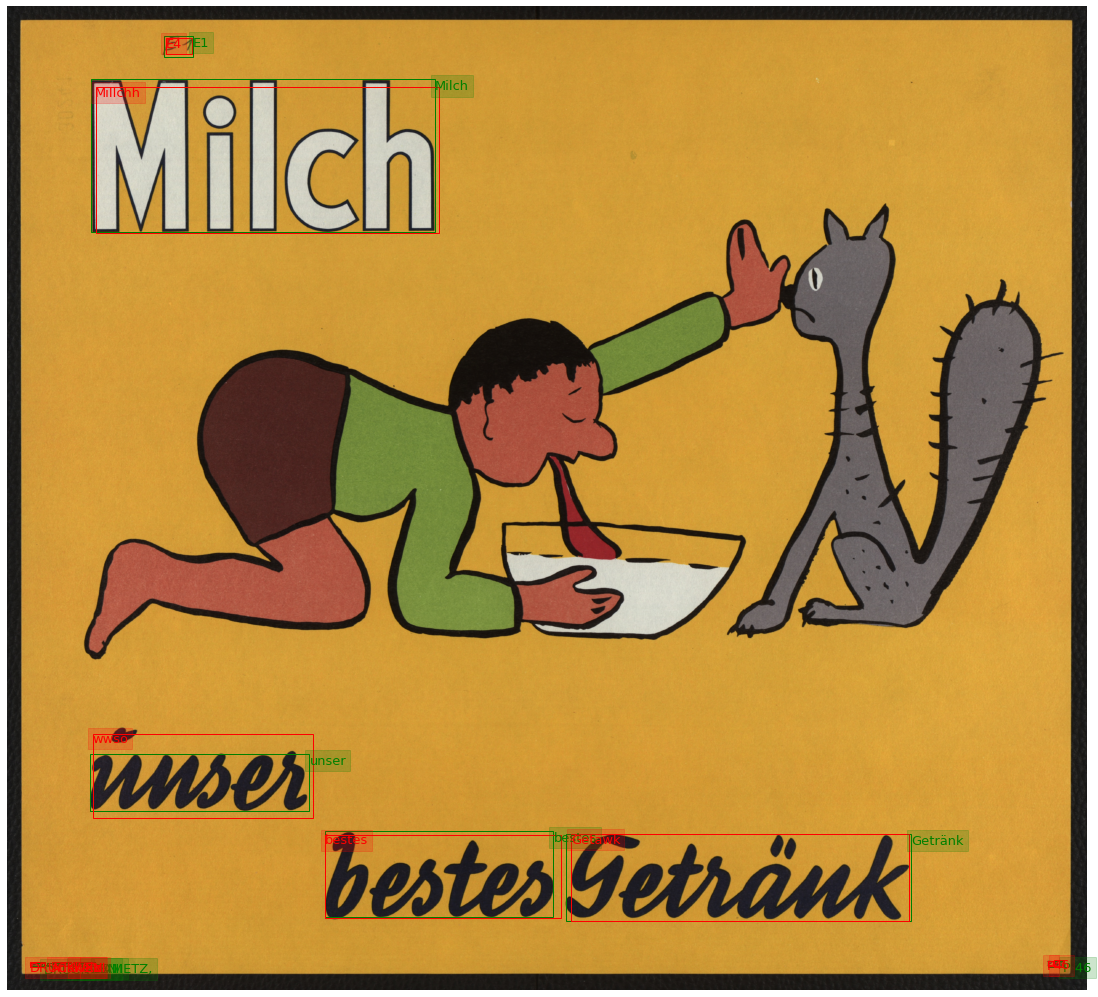

In [53]:
# all images / one sample image
# for i in range(len(images)):
im = plot_results(images[i], ground_truth[i], predicted[i])  
im.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

im.savefig('%s/result_%s-%s.png' % (output_dir, file_name, i))
im.show()